In [1]:
import pandas as pd
import io
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset 
import torch
import torch.nn as nn  # neural net layers and activations
from torch.optim import SGD  # Our chosen optimizer
from torch.utils.data import DataLoader, Dataset 
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
import torch.nn as nn

In [2]:
X = pd.read_csv('TrainData.csv', delimiter =',') #training data
y = pd.read_csv('selectivity.csv',delimiter=',') #true output labels, original

In [3]:
X.replace(0.1,0.0,inplace=True)
X.head()

,Elevation LB,Elevation UB,Aspect LB,Aspect UB,Slope LB,Slope UB,Horizontal_Distance_To_Hydrology LB,Horizontal_Distance_To_Hydrology UB,Vertical_Distance_To_Hydrology LB,Vertical_Distance_To_Hydrology UB,Horizontal_Distance_To_Roadways LB,Horizontal_Distance_To_Roadways UB,Hillshade_9am LB,Hillshade_9am UB,Hillshade_Noon LB,Hillshade_Noon UB,Hillshade_3pm LB,Hillshade_3pm UB,Horizontal_Distance_To_Fire_Points LB,Horizontal_Distance_To_Fire_Points UB
0,3396.0,3726.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2645.0,3033.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2131.0,3247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3625.0,3809.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3626.0,3642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#convert to numpy arrays
X = X.values
y = y.values #uaing this for model training

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) #testing 20%, trainig 80

In [6]:
#convert the X features to float tensors for pytorch.
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#converting selectivity, y labels to tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [7]:
y_train = y_train.float()
y_test = y_test.float()

In [8]:
#Neural Network Model, 2 hidden layers.
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__() # instantiate nn model
        self.fc1 = nn.Linear(20, 128)    #works better if we increase the number of nuerons in the hidden layers.
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 1)  # Output layer with single neuron

    def forward(self, x):
        print("Input shape:", x.shape)
        h1 = F.relu(self.fc1(x))
        print("Shape after fc1:", h1.shape)
        h2 = F.relu(self.fc2(h1))
        print("Shape after fc2:", h2.shape)
        output = self.out(h2)  # Linear activation for output layer
        print("Output shape:", output.shape)
        
        return output


In [9]:
model = MyModel()

In [10]:
#optimizer- wasn't specifically mentioned, popular methods are SGD ADAM,
#learning rate wasn't specified, going to keep it as 0.01
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.MSELoss()

In [11]:
epochs = 350
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Append the loss value to the list
    losses.append(loss.item())

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')  # Print epoch loss


Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [1/350], Loss: 9228.9053
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [2/350], Loss: 872010.8750
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [3/350], Loss: 105937.8281
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [4/350], Loss: 273.5337
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [5/350], Loss: 13102.0381
Input shape: torch.Size([16368, 20])
Shape after fc1: to

Epoch [44/350], Loss: 0.0032
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [45/350], Loss: 0.0030
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [46/350], Loss: 0.0029
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [47/350], Loss: 0.0027
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [48/350], Loss: 0.0026
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [49/350], Loss: 0.0025
Input shape: torch.Size([16368, 20])
Shap

Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [89/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [90/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [91/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [92/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [93/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([163

Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [133/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [134/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [135/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [136/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [137/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size

Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [177/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [178/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [179/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [180/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [181/350], Loss: 0.0017
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size

Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [221/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [222/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [223/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [224/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [225/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size

Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [265/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [266/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [267/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [268/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [269/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size

Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [309/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [310/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [311/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [312/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [313/350], Loss: 0.0016
Input shape: torch.Size([16368, 20])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size

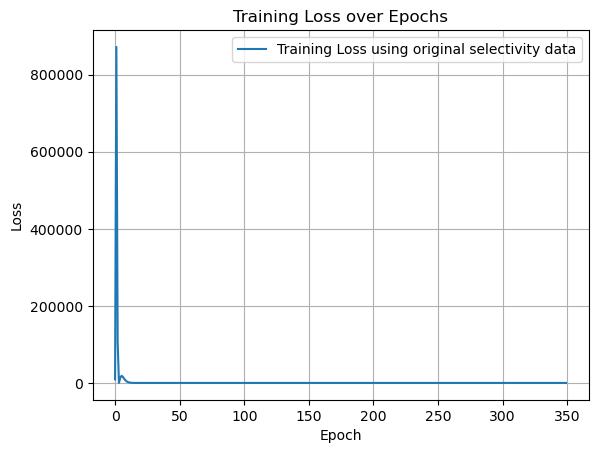

In [12]:
# Plot the loss values
import matplotlib.pyplot as plt

# Plot the loss values
plt.plot(range(epochs), losses, label='Training Loss using original selectivity data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Input shape: torch.Size([4092, 20])
Shape after fc1: torch.Size([4092, 128])
Shape after fc2: torch.Size([4092, 64])
Output shape: torch.Size([4092, 1])
Test Loss: 0.00082257273606956


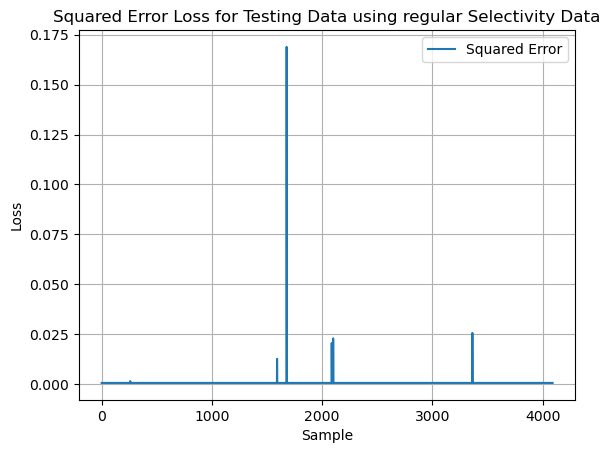

In [13]:
# Pass the testing data through the trained model to make predictions
with torch.no_grad():
    y_pred_test = model.forward(X_test)

# Compute the loss for the testing data
mse = nn.MSELoss()
test_loss = mse(y_pred_test, y_test)

# Print the test loss
print("Test Loss:", test_loss.item())

# Now, let's plot the loss
plt.figure()
plt.plot(range(len(y_test)), (y_pred_test - y_test)**2, label='Squared Error')
plt.xlabel('Sample')
plt.ylabel('Loss')
plt.title('Squared Error Loss for Testing Data using regular Selectivity Data')
plt.legend()
plt.grid(True)
plt.show()